# Probni rok

## 5. zadatak

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("data/klasterovanje.csv")
df.head()

,X1,X2,X3,X4
0,-9.66,4.58,6.32,9.06
1,6.90,4.88,-0.88,-5.87
2,1.84,-0.33,-3.74,-8.65
3,2.85,0.20,-0.68,-4.76
4,-1.73,4.82,2.53,5.82


In [4]:
df.describe()

,X1,X2,X3,X4
count,600.000000,600.000000,600.000000,600.000000
mean,-0.852367,1.661500,0.618117,-2.191833
std,6.641130,5.047969,3.890277,7.096578
min,-13.650000,-11.630000,-6.940000,-12.240000
25%,-7.610000,-0.442500,-2.322500,-8.205000
50%,0.140000,3.725000,-0.055000,-5.350000
75%,4.805000,5.552500,3.662500,5.452500
max,10.430000,8.470000,8.590000,10.910000


## Skaliranje

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaler.fit(df)
X = pd.DataFrame(scaler.transform(df), columns=["X1", "X2", "X3", "X4"])
X

,X1,X2,X3,X4
0,-1.327332,0.578636,1.466899,1.586852
1,1.168300,0.638115,-0.385414,-0.518734
2,0.405746,-0.394844,-1.121194,-0.910799
3,0.557956,-0.289764,-0.333961,-0.362190
4,-0.132261,0.626219,0.491862,1.129913
...,...,...,...,...
595,1.668632,1.258684,1.117017,-1.016572
596,1.029654,0.872068,-0.187319,-0.373472
597,-0.661227,-2.431023,-1.236963,-0.992597
598,1.091442,0.687681,-0.305662,-0.431295


In [29]:
X.describe()

,X1,X2,X3,X4
count,6.000000e+02,6.000000e+02,6.000000e+02,6.000000e+02
mean,1.184238e-17,5.625130e-17,3.256654e-17,-5.921189e-18
std,1.000834e+00,1.000834e+00,1.000834e+00,1.000834e+00
min,-1.928634e+00,-2.635236e+00,-1.944444e+00,-1.417099e+00
25%,-1.018392e+00,-4.171490e-01,-7.565195e-01,-8.480403e-01
50%,1.495521e-01,4.091193e-01,-1.731698e-01,-4.453980e-01
75%,8.525788e-01,7.714482e-01,7.832151e-01,1.078085e+00
max,1.700280e+00,1.349886e+00,2.050891e+00,1.847759e+00


## Vizuelizacija pocetnih podataka

In [30]:
pca = PCA()

In [31]:
pca.fit(X)
X_pca = pd.DataFrame(pca.transform(X), columns=[f"PCA_{i}" for i in range(0,4)])
X_pca

,PCA_0,PCA_1,PCA_2,PCA_3
0,2.423242,-0.902470,0.280676,-0.034426
1,-0.520664,1.300508,-0.475658,0.032905
2,-1.496824,0.156826,-0.284286,0.247522
3,-0.695453,0.314123,-0.043236,-0.231930
4,1.289860,-0.043491,-0.434116,-0.272375
...,...,...,...,...
595,0.264271,2.501387,0.564058,0.069473
596,-0.167725,1.314317,-0.471873,0.130517
597,-2.334107,-1.710400,0.663998,-0.219096
598,-0.378177,1.257056,-0.467437,0.043476


In [32]:
pca.explained_variance_ratio_

array([0.56919796, 0.36851207, 0.04991401, 0.01237596])

In [33]:
import matplotlib.pyplot as plt

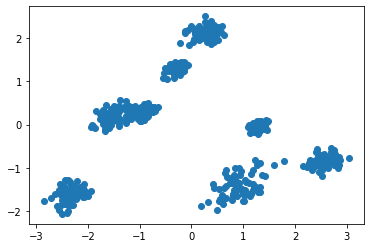

In [34]:
plt.scatter(X_pca["PCA_0"], X_pca["PCA_1"], marker='o')

## Treniranje modela

In [45]:
from sklearn.cluster import AgglomerativeClustering
from matplotlib import cm
import numpy as np
from sklearn.metrics import silhouette_score

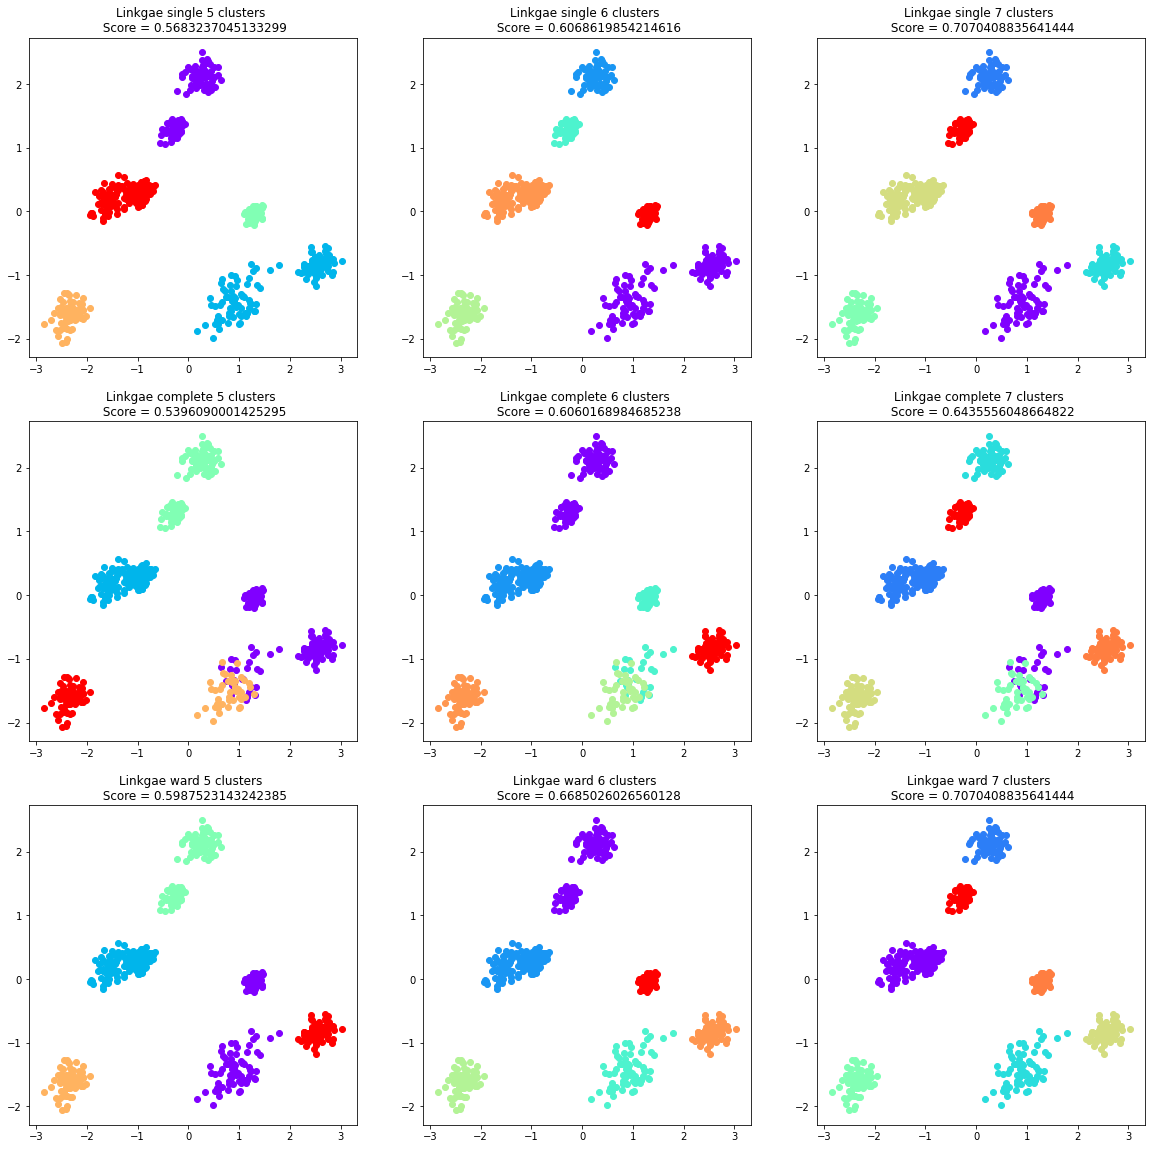

In [51]:
links = ["single", "complete", "ward"]
n_clusters = [5, 6, 7]

fig = plt.figure(figsize=(20,20))
plt_inx = 1

for l in links:
    for nc in n_clusters:
        
        model = AgglomerativeClustering(n_clusters=nc, linkage=l)
        model.fit(X)
        
        X_pca["label"] = model.labels_
        
        plt.subplot(3, 3, plt_inx)
        
        for i in range(nc):
            
            colors = cm.rainbow(np.linspace(0,1,nc))
            cluster = X_pca[X_pca["label"] == i]
            plt.scatter(cluster["PCA_0"], cluster["PCA_1"], color=colors[i])
            
        
        ss =  silhouette_score(X, model.labels_)
        plt.title(f"Linkgae {l} {nc} clusters \n Score = {ss}")
        plt_inx += 1
        
plt.show()